<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Test/objective-function" data-toc-modified-id="Test/objective-function-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Test/objective function</a></span></li><li><span><a href="#Gradient-Vector-Field¶" data-toc-modified-id="Gradient-Vector-Field¶-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gradient Vector Field¶</a></span></li><li><span><a href="#Trajectory-visualisation" data-toc-modified-id="Trajectory-visualisation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Trajectory visualisation</a></span></li><li><span><a href="#Trajectory-animation" data-toc-modified-id="Trajectory-animation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Trajectory animation</a></span></li><li><span><a href="#References" data-toc-modified-id="References-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
<hr style="border:2px solid black"> </hr>


**What?** Animating Optimization Algorithms with Matplotlib



# Imports
<hr style="border:2px solid black"> </hr>

In [1]:
import matplotlib.pyplot as plt
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

# Test/objective function
<hr style="border:2px solid black"> </hr>

In [2]:
# Beale's function
f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2

In [3]:
xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2

In [4]:
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep),
                   np.arange(ymin, ymax + ystep, ystep))

z = f(x, y)

# We know the global minima is at (3,0.5)
minima = np.array([3., .5])

f(*minima)

0.0

In [5]:
minima_ = minima.reshape(-1, 1)
minima_

array([[3. ],
       [0.5]])

In [6]:
f(*minima_)

array([0.])

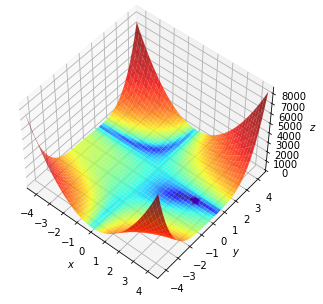

In [10]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1,
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

# Gradient Vector Field¶
<hr style="border:2px solid black"> </hr>

In [11]:
# We use autograd to compute the gradient vector field, and plot it with Matplotlib's quiver method.
dz_dx = elementwise_grad(f, argnum=0)(x, y)
dz_dy = elementwise_grad(f, argnum=1)(x, y)

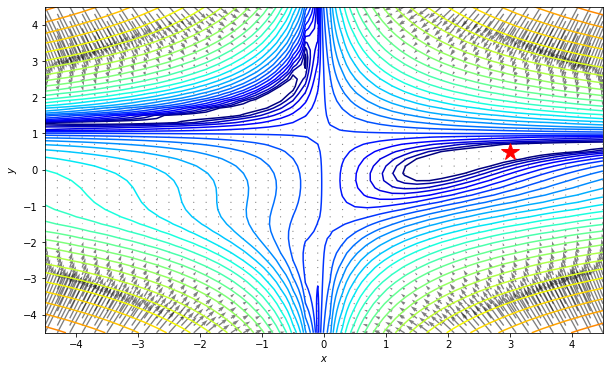

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35),
           norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(x, y, x - dz_dx, y - dz_dy, alpha=.5)
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

# Trajectory visualisation
<hr style="border:2px solid black"> </hr>

In [13]:
def make_minimize_cb(path=[]):
    """
    callback function that appends the intermediate values 
    to a list instead of simply printing it.
    """

    def minimize_cb(xk):
        # note that we make a deep copy of xk
        path.append(np.copy(xk))

    return minimize_cb

In [15]:
x0 = np.array([3., 4.])
path_ = [x0]

In [17]:
func = value_and_grad(lambda args: f(*args))

In [18]:
res = minimize(func, x0=x0, method='Newton-CG',
               jac=True, tol=1e-20, callback=make_minimize_cb(path_))



In [19]:
dict(res)

{'fun': 9.612758678607413e-17,
 'jac': array([-3.00715224e-09, -2.19859221e-09]),
 'nfev': 26,
 'njev': 78,
 'nhev': 0,
 'status': 0,
 'success': True,
 'message': 'Optimization terminated successfully.',
 'x': array([2.99999994, 0.49999999]),
 'nit': 24}

In [20]:
path = np.array(path_).T
path.shape

(2, 25)

(-4.5, 4.5)

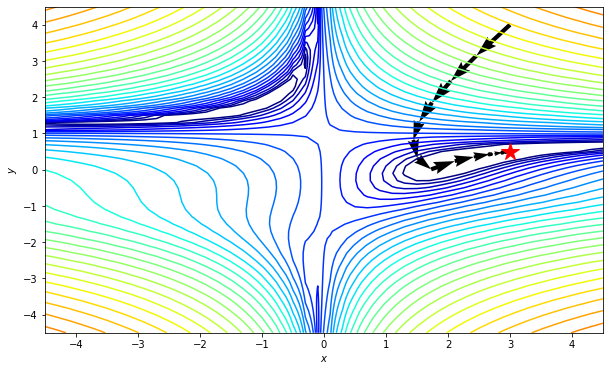

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35),
           norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0, :-1], path[1, :-1], path[0, 1:]-path[0, :-1], path[1,
          1:]-path[1, :-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

(-4.5, 4.5)

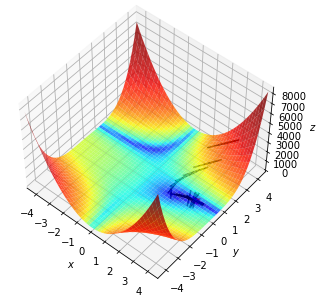

In [22]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1,
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.quiver(path[0, :-1], path[1, :-1], f(*path[::, :-1]),
          path[0, 1:]-path[0, :-1], path[1, 1:] -
          path[1, :-1], f(*(path[::, 1:]-path[::, :-1])),
          color='k')
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

# Trajectory animation
<hr style="border:2px solid black"> </hr>

(-4.5, 4.5)

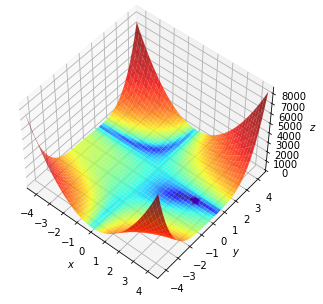

In [26]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1,
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

line, = ax.plot([], [], [], 'b', label='Newton-CG', lw=2)
point, = ax.plot([], [], [], 'bo')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

In [27]:
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

In [28]:
def animate(i):
    line.set_data(path[0, :i], path[1, :i])
    line.set_3d_properties(f(*path[::, :i]))
    point.set_data(path[0, i-1:i], path[1, i-1:i])
    point.set_3d_properties(f(*path[::, i-1:i]))
    return line, point

In [29]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60,
                               repeat_delay=5, blit=True)

In [30]:
HTML(anim.to_html5_video())

# References
<hr style="border:2px solid black"> </hr>


- Visualizing and Animating Optimization Algorithms with Matplotlib

